In [1]:
import numpy as np
from saem import CSEMData

In [2]:
f = [10, 100, 1000]
x = np.arange(10., 3001, 10)

CSEM data with 300 stations and 3 frequencies
Transmitter length 1000m
Median Rx distance 10.0m
Sounding pos at 10.000000,0.000000,100.000000,
None


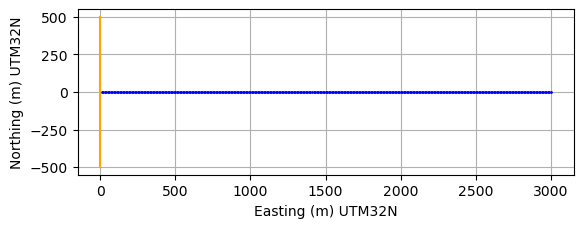

In [3]:
txLen = 1000  # length of the transmitter
altitude = 100
self = CSEMData(f=f, rx=x, txPos=np.array([[0, 0], [-txLen/2, txLen/2]]), alt=altitude)
print(self)
self.cmp = [1, 0, 1]  # Bx and Bz to be plotted
self.showPos();

In [4]:
rho2 = 1000
rho = [1000, rho2, 1000]
thk = [100, 100]
self.simulate(rho=rho, thk=thk)
self.basename = "1000-{:d}-1000".format(rho2)

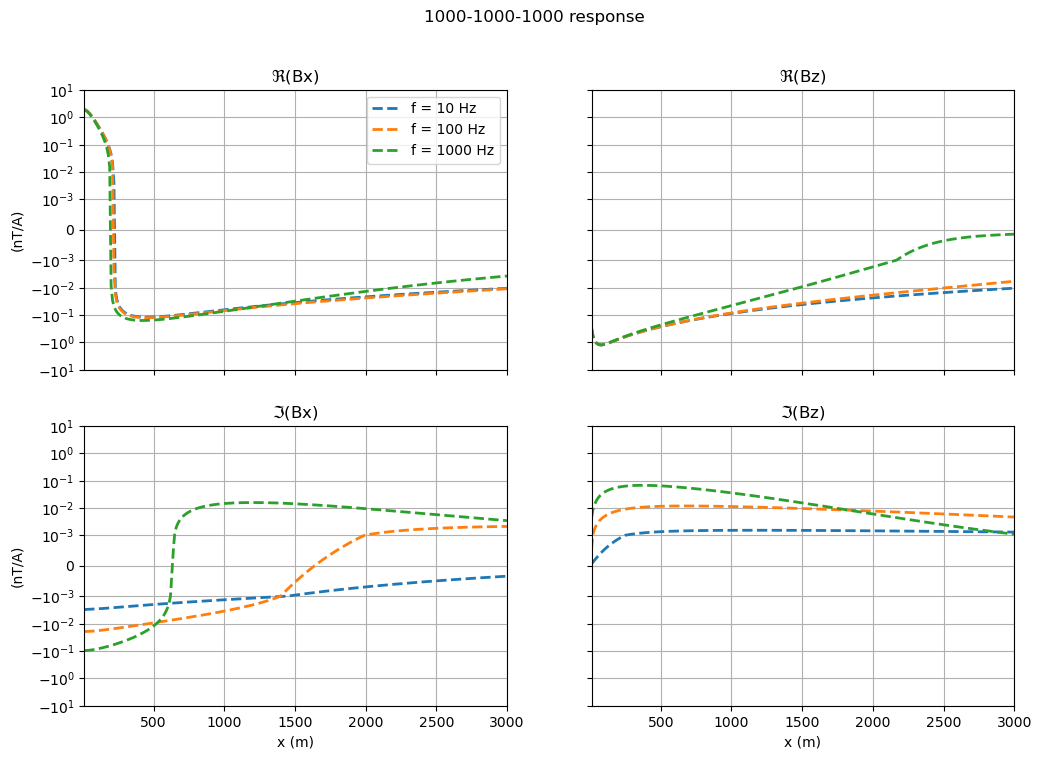

In [6]:
kw = dict(line=1, what="response", x="x", alim=[1e-3, 10.], lw=2)
ax=None  # new axis
for i, f in enumerate(self.f):
    fig, ax = self.showLineFreq(nf=i, ax=ax, label="f = {:d} Hz".format(f), **kw)

Now we want to do it with other resistivities for the second layer and make a plot for each frequency but with three lines for the individual models.

Warning! No error bars and response comparison implemented yet for amplitude and phase plots with the linefreq method. Continuing  ...
Warning! No error bars and response comparison implemented yet for amplitude and phase plots with the linefreq method. Continuing  ...
Warning! No error bars and response comparison implemented yet for amplitude and phase plots with the linefreq method. Continuing  ...
Warning! No error bars and response comparison implemented yet for amplitude and phase plots with the linefreq method. Continuing  ...
Warning! No error bars and response comparison implemented yet for amplitude and phase plots with the linefreq method. Continuing  ...
Warning! No error bars and response comparison implemented yet for amplitude and phase plots with the linefreq method. Continuing  ...
Warning! No error bars and response comparison implemented yet for amplitude and phase plots with the linefreq method. Continuing  ...
Warning! No error bars and response comparison implemen

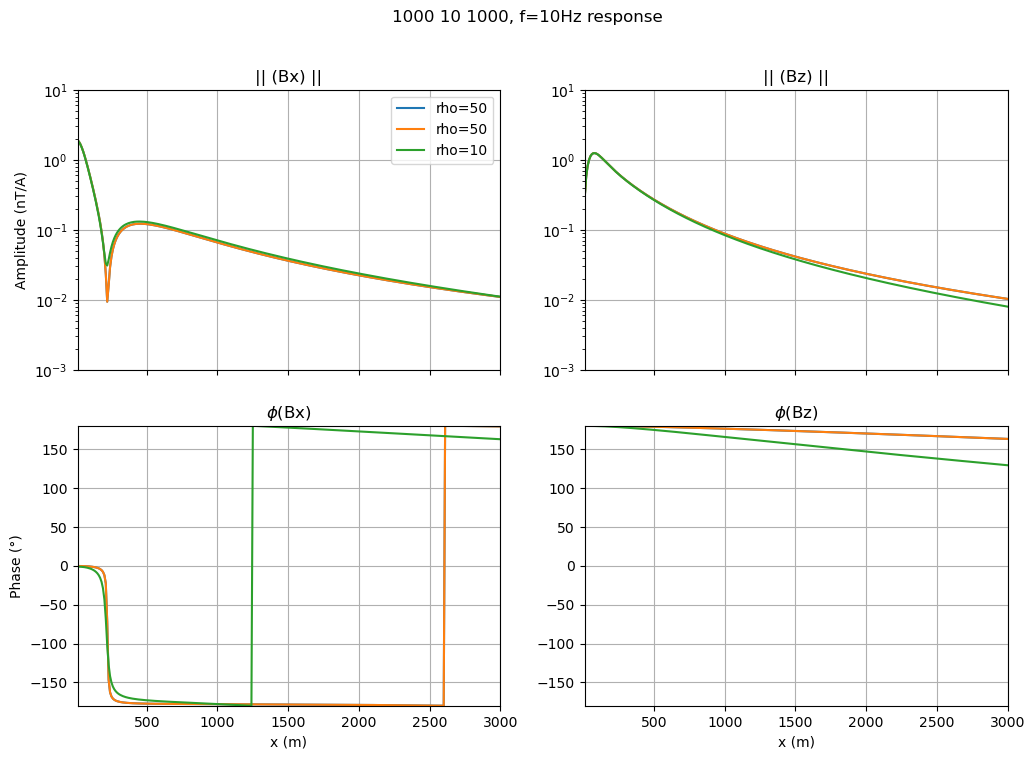

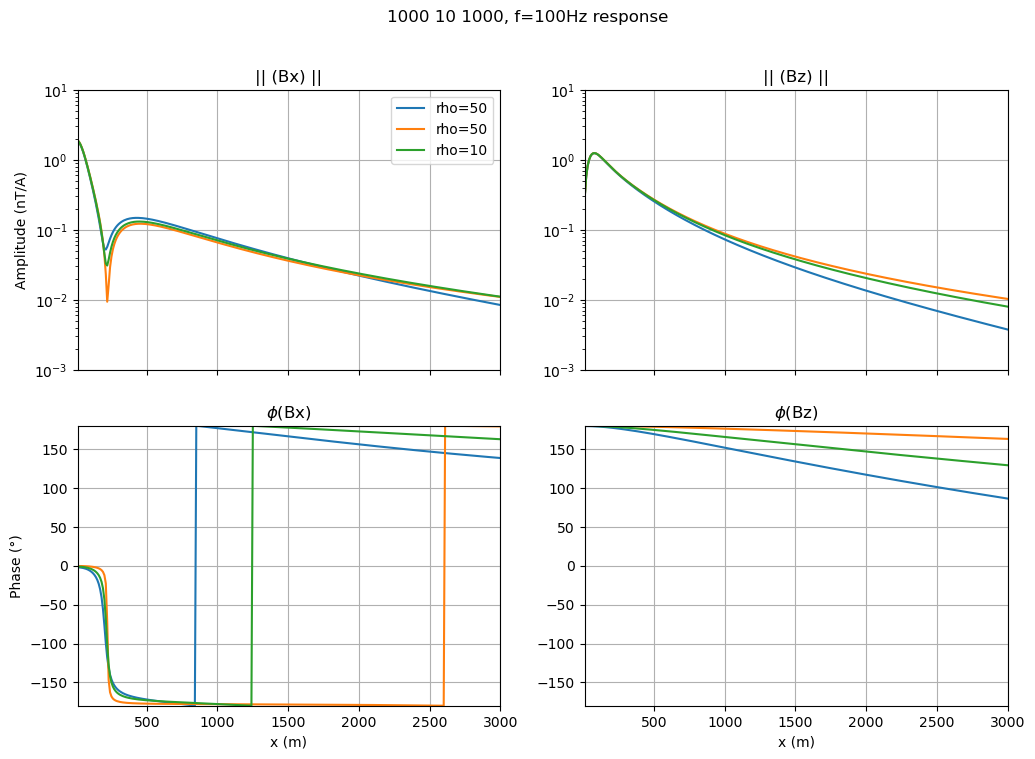

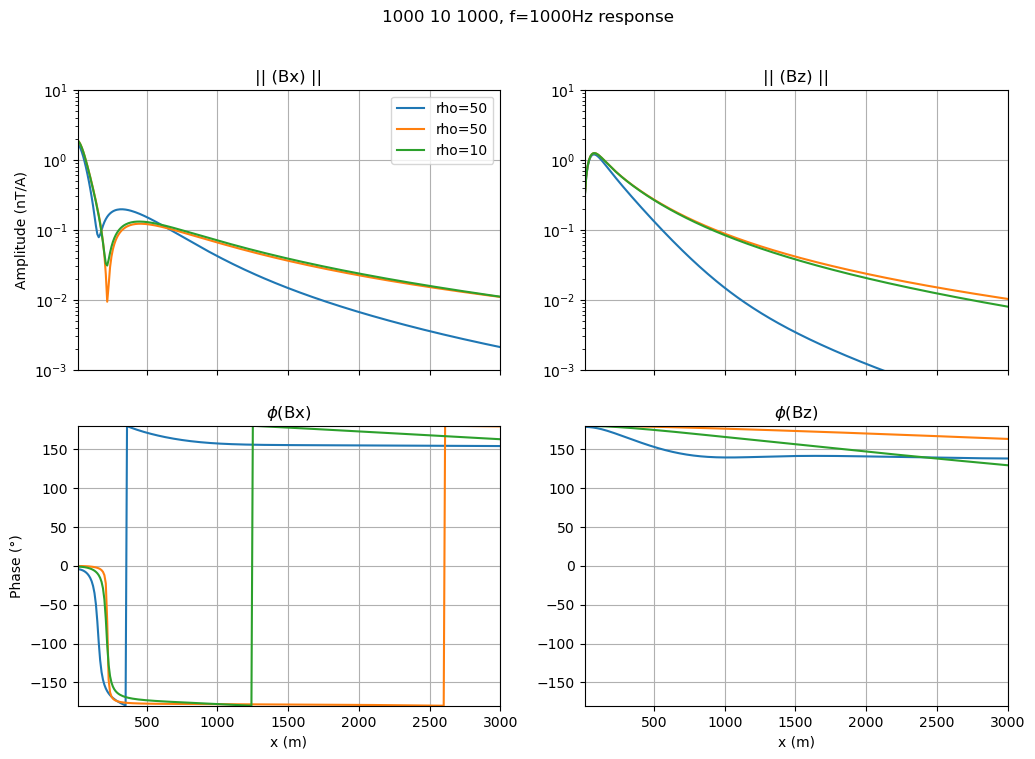

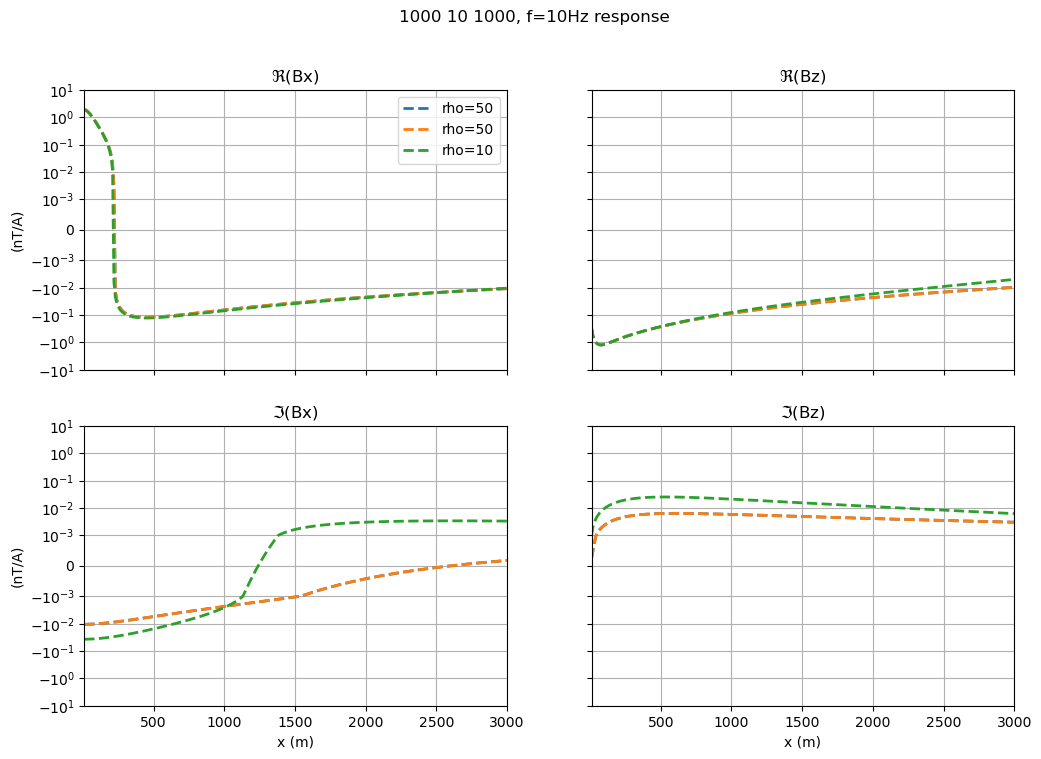

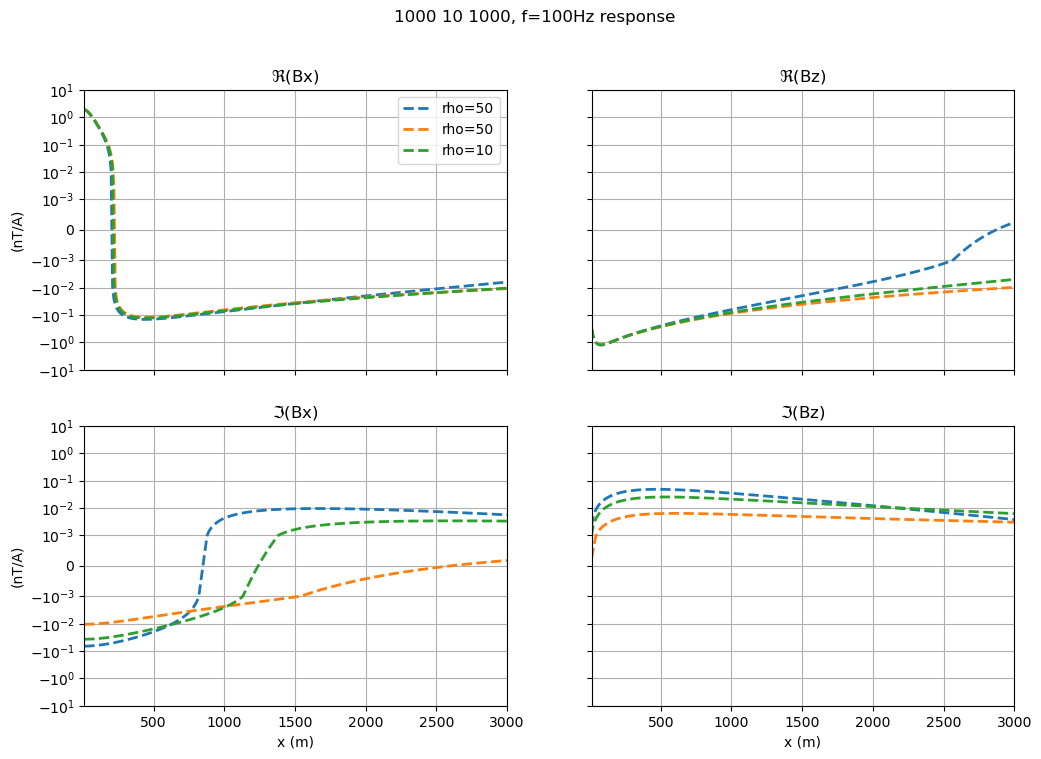

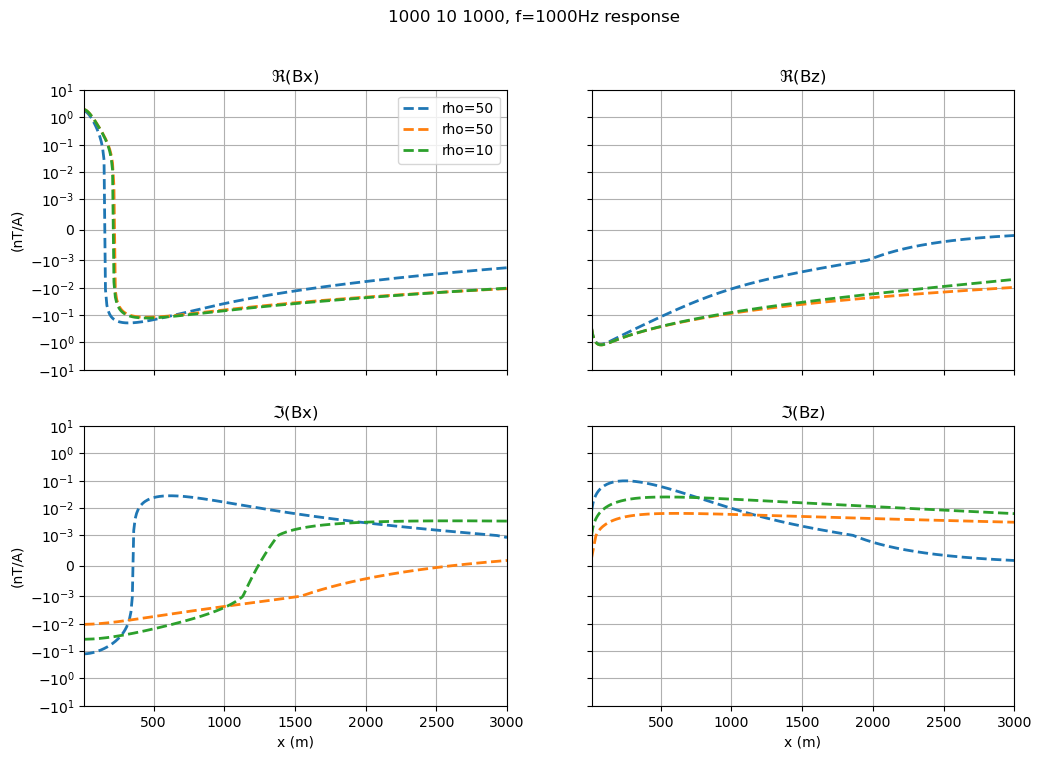

In [8]:
axAP = [self.showLineFreq(nf=i, label="rho={:d}".format(rho2), **kw, amphi=1)[1]
       for i in range(3)]
axRI = [self.showLineFreq(nf=i, label="rho={:d}".format(rho2), **kw)[1]
       for i in range(3)]
for rho2 in [50, 10]:
    rho = [1000, rho2, 1000]
    self.simulate(rho=rho, thk=thk)
    for i in range(3):
        self.basename = "1000 {:d} 1000, f={:d}Hz".format(rho2, self.f[i])
        self.showLineFreq(nf=0, label="rho={:d}".format(rho2), ax=axRI[i], **kw)
        self.showLineFreq(nf=0, label="rho={:d}".format(rho2), ax=axAP[i],
                          amphi=True, **kw)